# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [14]:
import pandas as pd
print("ewa")
network1 = pd.read_csv('../data/network1.csv', comment = '#', header = None)
network1.columns = ['fromNode', 'toNode']
network1.head()
print("ewa")

ewa
ewa


#### Exercise 2.2:  Node degree distribution

In [15]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(network1, 'fromNode', 'toNode')

In [16]:
num_edges = len(network1.index)
print(num_edges)

18584


In [17]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 69, 70, 73, 75, 77, 79, 81, 86, 91, 95, 106, 113, 126, 128, 129, 141, 148, 155, 159, 168, 194, 207, 216, 225, 248, 292, 300, 379, 455, 467, 619, 691, 1083, 1482) (8192, 2889, 736, 331, 202, 132, 86, 53, 49, 43, 36, 18, 13, 15, 27, 8, 16, 7, 10, 13, 9, 8, 6, 10, 5, 5, 3, 7, 5, 5, 1, 4, 3, 6, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


Text(0.5, 0, 'degree')

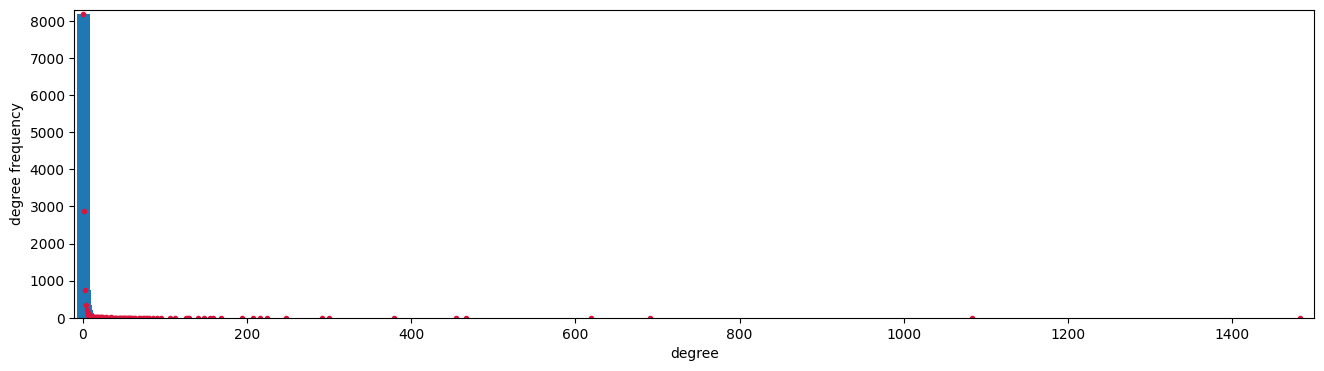

In [18]:
import matplotlib.pyplot as plt
import collections

degree_sequence = sorted((val for (node, val) in G.degree()), reverse=False)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print(deg, cnt)

fig, ax = plt.subplots(ncols=1, figsize=(16, 4))

ax.scatter(deg , cnt, color='crimson', marker='.', zorder=2)
plt.axis([-10, 1500, 0, 8300])
ax.bar(deg, cnt, width=15, zorder=1)
ax.set_ylabel('degree frequency')
ax.set_xlabel('degree')

1. What kind of plot do you think is useful for this task?
**It could be a histogram, scatter or bar graph. It should show how frequent degrees appears in the dataset.**

2. Can you list some of the properties of the degree distribution?
**An important graph property is the degree distribution function P (k), that describes the probability to find a node with k edges**

3. Is it close to a well-known probability distribution? If so, provide an estimation of its
parameter(s)?
**Probably it looks a little bit like a power-law distribution**
**A scale-free graph is instead characterized by a power-law degree distribution P (k) = Ak −γ , usually with 2 < γ < 3. A power-law distribution appears as a straight line in a double-logarithmic plot. In a scale-free graph, low degree nodes are the most frequent ones, but there are also a few highly connected nodes, usually called hubs.**

In [19]:
#nx.draw(G)

#### Exercise 2.3: Giant component

In [20]:
print(nx.number_connected_components(G))

192


In [21]:
import numpy as np
np_cnt = np.array(cnt)
np_deg = np.array(deg)
c = sum(np_cnt * np_deg) / len(G)

print(c)
if c > 1:
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    print(G0)
else:
    print("There is no giant component")

2.8518376429064682
Graph with 12576 nodes and 18317 edges


#### Exercise 2.4: Short paths & Small-worlds

In [22]:
avg_length = []
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    avg_length.append(nx.average_shortest_path_length(C))
print(sum(avg_length) / len(avg_length))

1.1072818079387936


In [23]:
shortest_paths = list(nx.shortest_path_length(G))

In [24]:
paths_list = []
for node in shortest_paths:
    temp = [value for value in node[1].values()]
    paths_list.extend(temp)
print(paths_list)

degree_sequence = sorted((val for (node, val) in G.degree()), reverse=False)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
#print(deg, cnt)

fig, ax = plt.subplots(ncols=1, figsize=(16, 4))

#ax.scatter(deg , cnt, color='crimson', marker='.', zorder=2)
plt.axis([-10, 1500, 0, 8300])
#ax.bar(deg, cnt, width=15, zorder=1)
ax.hist(paths_list)
ax.set_ylabel('degree frequency')
ax.set_xlabel('degree')

In [ ]:
r = 2

paths_list = []
for node in shortest_paths:
    #temp = [value for value in shortest_paths[node].values()]
    paths_list.append(1 for value in shortest_paths[node].values() if value <= r)
print(len(paths_list))

TypeError: list indices must be integers or slices, not tuple

#### Exercise 2.5: Network comparison

In [ ]:
network2 = pd.read_csv('../data/network2.csv', comment = '#', header = None)
network2.columns = ['fromNode', 'toNode']
network2.head()

,fromNode,toNode
0,135627,135630
1,135627,135623
2,135627,135625
3,135627,135626
4,137038,137040


**Properties of previous network**

#### Exercise 2.6: Network identification